<a href="https://colab.research.google.com/github/srikanth7615/Neural-networks/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
data = pd.read_csv('Breast Cancer.csv')# Loading Breast Cancer dataset
print(data.head())
sc = StandardScaler()# Normalizing the data
X_normalized = sc.fit_transform(X)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
model = Sequential()# Defining the model and adding dense layers
model.add(Dense(64, activation='relu', input_dim=30))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Additional Dense layer
model.add(Dense(16, activation='relu'))  # Additional Dense layer
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])# Compiling the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)# Training the model
_, accuracy = model.evaluate(X_test, y_test)# Calculating accuracy
print("Accuracy:", accuracy)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3872 - accuracy: 0.8912 - val_loss: 0.2137 - val_accuracy: 0.9406
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1835 - accuracy: 0.9462 - val_loss: 0.1553 - val_accuracy: 0.9558
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1298 - accuracy: 0.9615 - val_loss: 0.1297 - val_accuracy: 0.9614
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0985 - accuracy: 0.9713 - val_loss: 0.1111 - val_accuracy: 0.9687
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9769 - val_loss: 0.1076 - val_accuracy: 0.9680
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9861 - val_loss: 0.0984 - val_accuracy: 0.9705
Epoch 

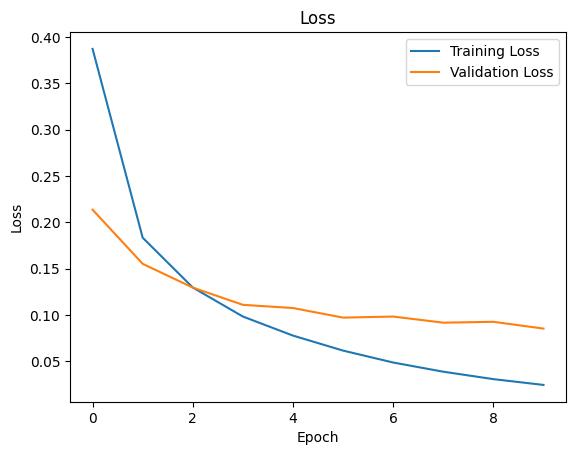

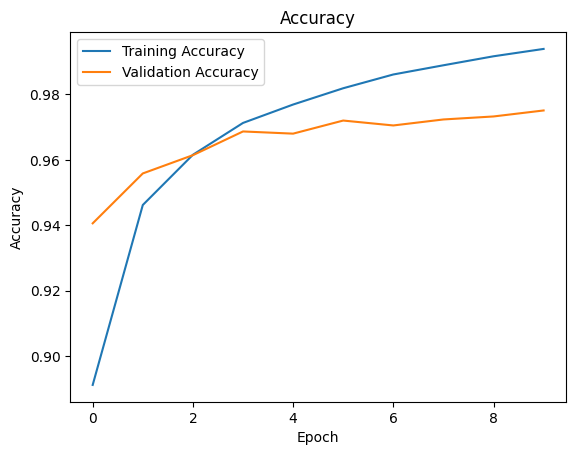

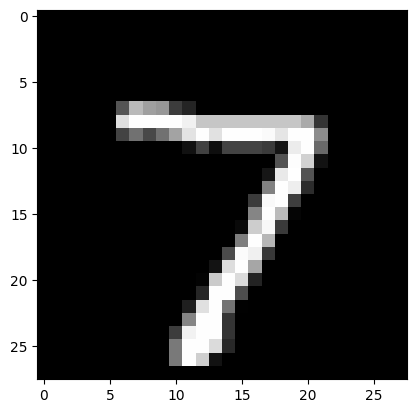

1/1 [==============================] - 0s 39ms/step
Predicted class: 7


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Change number of hidden layers and activation function
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
#  Plot loss function and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot one image and do inferencing to check
plt.imshow(X_test[0], cmap='gray')
plt.show()
# checking the performance
prediction = model.predict(X_test[0].reshape(1, 28, 28))
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)